In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's also assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses

Ho(null): there is no difference in the probabilities that one type of golf ball is more likley to end up in the water than another. (equal likelihood)

Ha(alternate): some types of golf balls end up in the water more frequently than others. (some difference)

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

In [5]:
Expected = 25

#Type A:
Observed_A = 30
print(abs(Observed_A - Expected))

#Type B:
Observed_B = 30
print(abs(Observed_B - Expected))

#Type C:
Observed_C = 20
print(abs(Observed_C - Expected))

#Type D:
Observed_D = 20
print(abs(Observed_D - Expected))

# Sum is equal to 20, when if the null were true, it would be equal to 0.
# Therefore, is it too far off?

obs = np.array([30,30,20,20])
obs_ts= abs(obs-25).sum()
obs_ts

5
5
5
5


20

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

In [6]:
ts = []
for _ in np.arange(10000):
    random_sample = stats.multinomial.rvs(100, [0.25,0.25,0.25,0.25], size=1)
    ts = np.append(ts,sum(abs(sum(random_sample)-25)))
    
ts

array([14., 14., 20., ..., 14., 10., 12.])

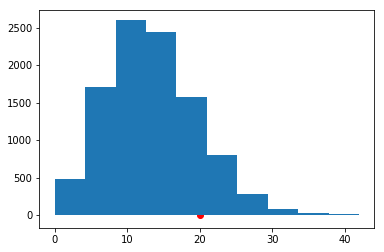

In [14]:
plt.hist(ts)
plt.scatter(obs_ts,0, color = 'red')
plt.show()

In [15]:
np.mean(ts >= 20)

0.1883

Step 4: Conclude

Fail to reject the null hypothesis. 20 isn't that weird. We have some evidence, but not enough to say that they are not equal. The observed data is largely within the distribution, which means that it could very well be chance that causes some balls to end up in the water more times than others.

What kind of error could we have made in this case? 

Type 2 - false negative; because we failed to reject the null hypothesis when it could be false.

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [31]:
print(percentile(95, ts))
print(np.mean(ts>=25))
#Critical value is the value at which you will reject the null hypothesis
crit=25

24.0
0.039


Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

In [32]:
ts_power = []
for _ in np.arange(10000):
    random_sample = stats.multinomial.rvs(100, [0.3,0.3,0.2,0.2], size=1)
    ts_power = np.append(ts_power,sum(abs(sum(random_sample)-25)))
    
ts_power

array([28., 24., 38., ..., 22., 22., 12.])

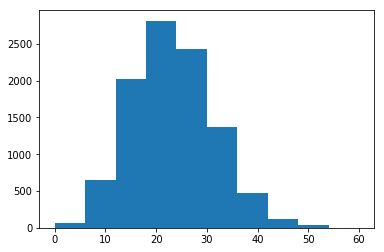

In [33]:
plt.hist(ts_power)
plt.show()

What do you think about this power? 

In [34]:
# Power:
np.mean(ts_power>=25)

0.3538

In [35]:
# Probability of making a Type II error:
(1 - np.mean(ts_power>=25))*100

64.62

This power is quite low... and the probability that we get a Type II error is consequently very high.

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

In [36]:
ts_500 = []
for _ in np.arange(10000):
    random_sample = stats.multinomial.rvs(500, [0.25,0.25,0.25,0.25], size=1)
    ts_500 = np.append(ts_500,sum(abs(sum(random_sample)-125)))
    
ts_500

array([36., 26., 18., ..., 18., 14., 16.])

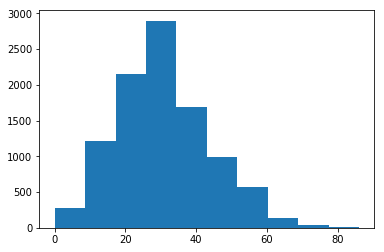

In [37]:
plt.hist(ts_500)
plt.show()

In [38]:
percentile(95,ts_500)

54.0

In [39]:
np.mean(ts_500>=55)

0.0486

crit_500 = 55

In [42]:
ts_500_power = []
for _ in np.arange(10000):
    random_sample = stats.multinomial.rvs(500, [0.3,0.3,0.2,0.2], size=1)
    ts_500_power = np.append(ts_500_power,sum(abs(sum(random_sample)-125)))
    
ts_500_power

array([ 76.,  90.,  84., ..., 104.,  70., 124.])

In [51]:
# Power:
np.mean(ts_500_power >= 55)

0.9838

In [53]:
# Probability of making a Type II error:
(1 - np.mean(ts_500_power >= 55))*100

1.6199999999999992

This power is very high... and the probability that we get a Type II error is consequently very low.